## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Q 1.1 run the code to create the datasets
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

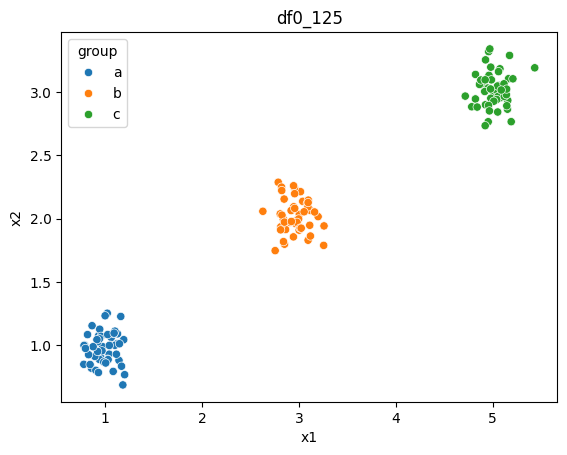

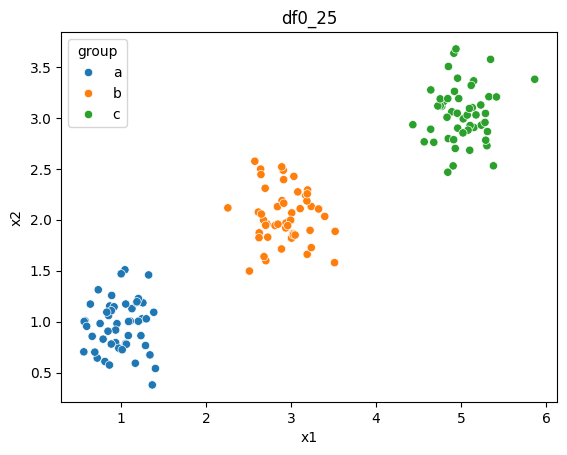

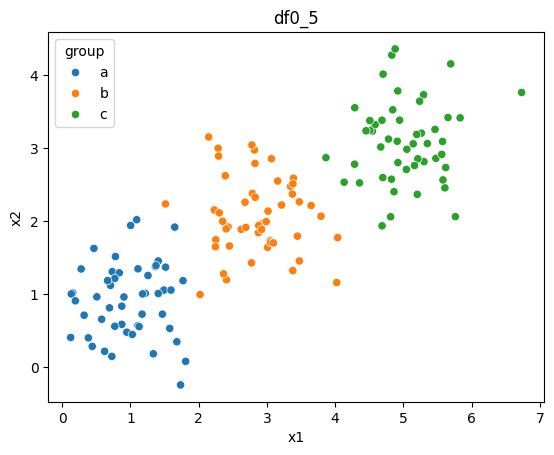

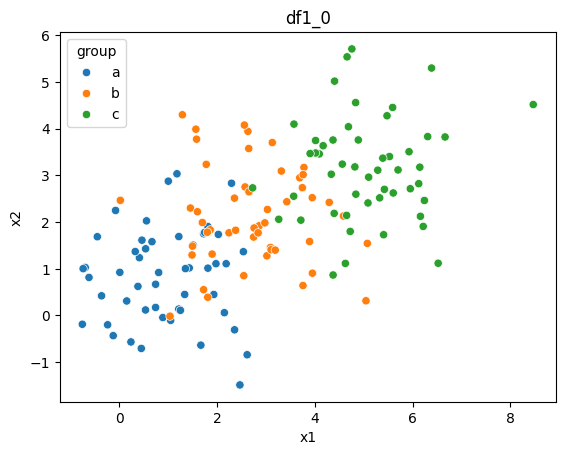

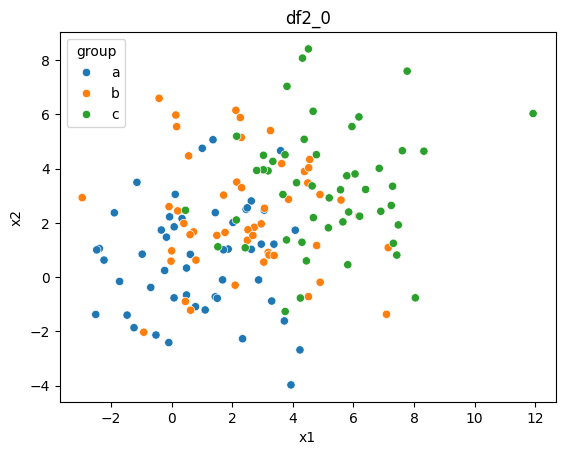

In [3]:
# Q 1.2 Make scatterplots of the (𝑋1,𝑋2) points by group for each of the datasets
sns.scatterplot(data=df0_125, x='x1', y='x2', hue='group')
plt.title('df0_125')
plt.show()

sns.scatterplot(data=df0_25, x='x1', y='x2', hue='group')
plt.title('df0_25')
plt.show()

sns.scatterplot(data=df0_5, x='x1', y='x2', hue='group')
plt.title('df0_5')
plt.show()

sns.scatterplot(data=df1_0, x='x1', y='x2', hue='group')
plt.title('df1_0')
plt.show()

sns.scatterplot(data=df2_0, x='x1', y='x2', hue='group')
plt.title('df2_0')
plt.show()

**As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?**

The clusters get much less visually distinct as noise increases from 0.125 to 2.0.

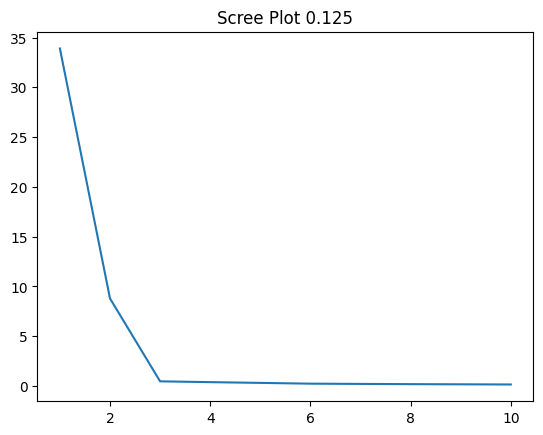

In [5]:
# 1.3 Create a scree plot for each of the datasets
from sklearn.cluster import KMeans

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# scree plot for 0.125
X = df0_125[['x1','x2']]
X = X.apply(maxmin)
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot 0.125') # Create scree plot
plt.show()

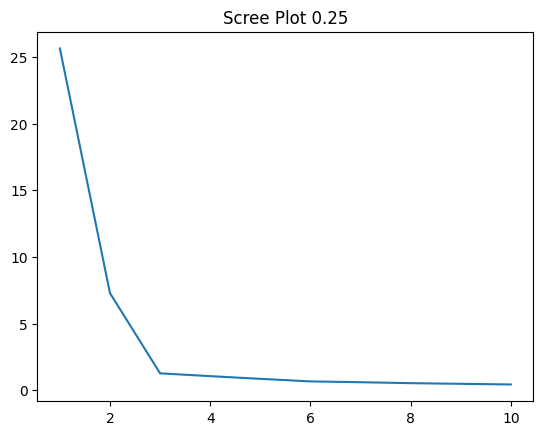

In [6]:
# scree plot for 0.25
X = df0_25[['x1','x2']]
X = X.apply(maxmin)
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot 0.25') # Create scree plot
plt.show()

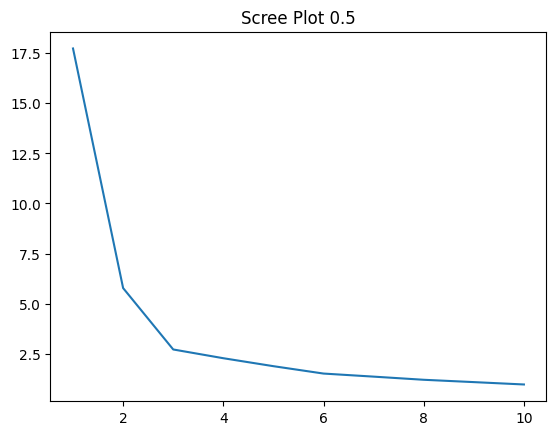

In [7]:
# scree plot for 0.5
X = df0_5[['x1','x2']]
X = X.apply(maxmin)
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot 0.5') # Create scree plot
plt.show()

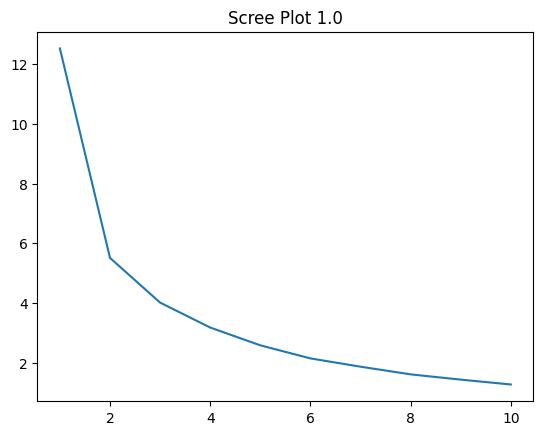

In [8]:
# scree plot for 1.0
X = df1_0[['x1','x2']]
X = X.apply(maxmin)
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot 1.0') # Create scree plot
plt.show()

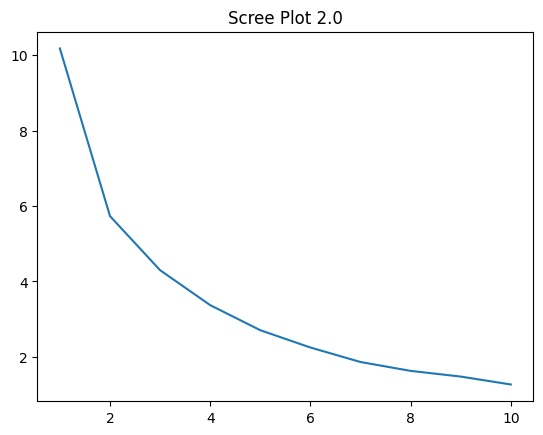

In [9]:
# scree plot for 2.0
X = df2_0[['x1','x2']]
X = X.apply(maxmin)
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot 2.0') # Create scree plot
plt.show()

**Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a  𝑘**

As the level of noise increases picking out a clear "elbow" in the plot gets more difficult, so it is not as easy to pick the optimal k value.

**Q 1.4 Explain the intuition of the elbow, using this numerical simulation as an example.**



**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [10]:
# 2.1 load the data
url = "https://raw.githubusercontent.com/kpunsalan8/clustering-KP/refs/heads/main/assignment/data/2022%20election%20cycle%20fundraising.csv"
df = pd.read_csv(url)
df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [11]:
df.dtypes

,0
index,int64
Member,object
Party,object
State,object
Chamber,object
Raised,object
Spent,object
Cash on Hand,object
Debts,object


In [13]:
# clean the variables denominated in dollars
columns_to_clean = ["Raised", "Spent", "Cash on Hand", "Debts"]

# remove dollar signs and commas
df[columns_to_clean] = df[columns_to_clean].replace({'\$': '', ',': ''}, regex=True)

# convert to float
df[columns_to_clean] = df[columns_to_clean].astype(float)

In [14]:
df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


In [15]:
# 2.2 Max-min normalize Raised and Spent
X = df[['Raised','Spent']]
X = X.apply(maxmin)

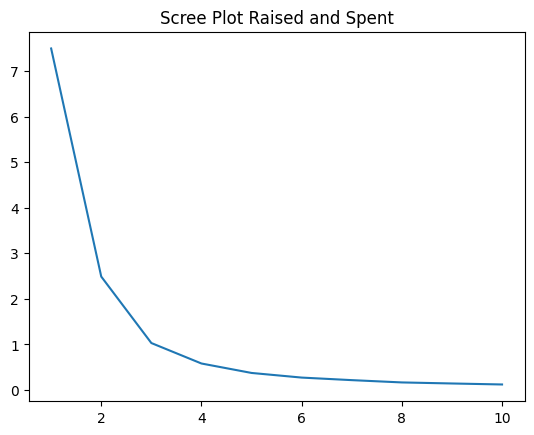

In [16]:
# Use a scree plot to determine the optimal number of clusters
k_bar = 10
SSE = []
for k in range(k_bar):
    model1 = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model1 = model1.fit(X) # Fit the model
    SSE.append(model1.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot Raised and Spent') # Create scree plot
plt.show()

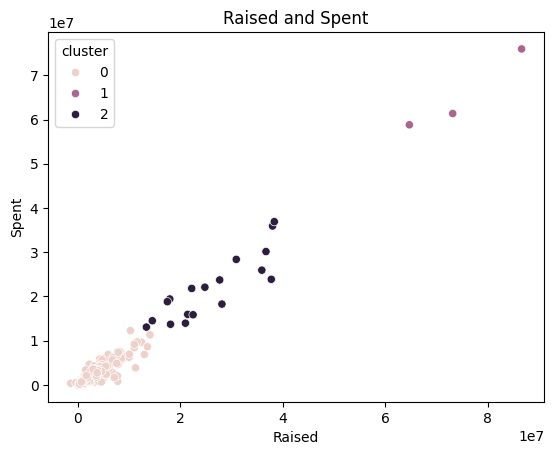

In [17]:
# scatter plot of Raised against Spent and hue the dots by their cluster membership
model1 = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model1 = model1.fit(X) # Fit the model
df['cluster'] = model1.predict(X)
sns.scatterplot(data=df, x='Raised', y='Spent', hue='cluster')
plt.title('Raised and Spent')
plt.show()

In [23]:
df["Cluster"] = model1.labels_  # Assign cluster labels to the dataframe

In [24]:
# Which politicians comprise the smallest two clusters?
# politicians in cluster 1
cluster_1 = df[df["Cluster"] == 1]
print("Politicians in Cluster 1:")
print(cluster_1)

Politicians in Cluster 1:
     index           Member       Party    State Chamber      Raised  \
340    340       Mark Kelly  Democratic  Arizona  Senate  73140886.0   
417    417  Raphael Warnock  Democratic  Georgia  Senate  86581469.0   
523    523      Val Demings  Democratic  Florida   House  64682883.0   

          Spent  Cash on Hand  Debts  cluster  Cluster  
340  61357281.0    13186127.0    0.0        1        1  
417  75959810.0    22762985.0    0.0        1        1  
523  58806664.0     6647641.0    0.0        1        1  


In [25]:
# politicians in cluster 2
cluster_2 = df[df["Cluster"] == 2]
print("Politicians in Cluster 2:")
print(cluster_2)

Politicians in Cluster 2:
     index                  Member       Party           State Chamber  \
2        2             Adam Schiff  Democratic      California   House   
87      87  Catherine Cortez Masto  Democratic          Nevada  Senate   
89      89           Chuck Schumer  Democratic        New York  Senate   
115    115            Dan Crenshaw  Republican           Texas   House   
261    261            John Kennedy  Republican       Louisiana  Senate   
290    290            Katie Porter  Democratic      California   House   
298    298          Kevin McCarthy  Republican      California   House   
326    326           Maggie Hassan  Democratic   New Hampshire  Senate   
328    328             Marco Rubio  Republican         Florida  Senate   
357    357          Michael Bennet  Democratic        Colorado  Senate   
390    390            Nancy Pelosi  Democratic      California   House   
402    402            Patty Murray  Democratic      Washington  Senate   
414    414  

In [26]:
# 2.3 Repeat part 2, but for Cash on Hand and Debts
X_2 = df[['Cash on Hand','Debts']]
X_2 = X.apply(maxmin)

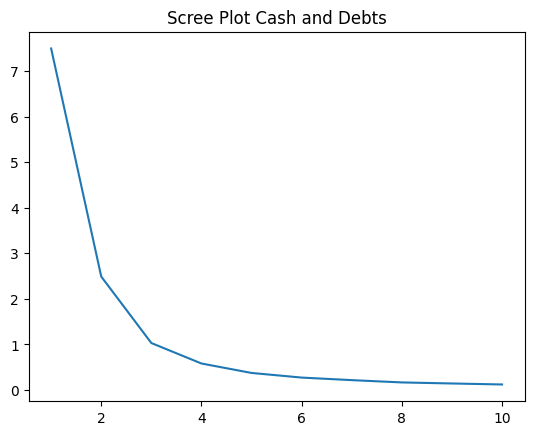

In [27]:
# scree plot
k_bar = 10
SSE = []
for k in range(k_bar):
    model2 = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model2 = model2.fit(X_2) # Fit the model
    SSE.append(model2.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot Cash and Debts') # Create scree plot
plt.show()

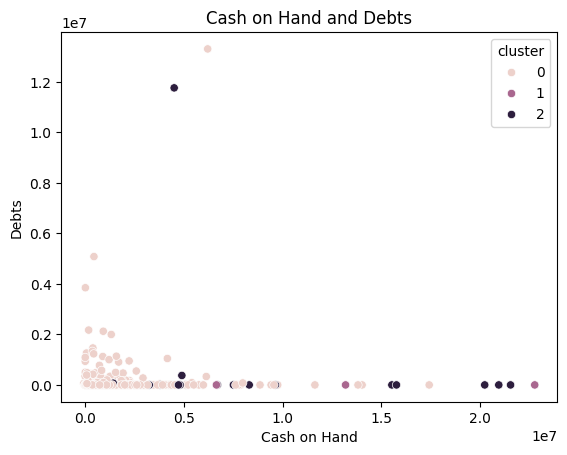

In [28]:
# scatter plot of Cash on Hand against Debts and hue the dots by their cluster membership
model2 = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model2 = model2.fit(X_2) # Fit the model
df['cluster'] = model2.predict(X_2)
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='cluster')
plt.title('Cash on Hand and Debts')
plt.show()

In [29]:
df["Cluster"] = model2.labels_  # Assign cluster labels to the dataframe

In [30]:
# Which politicians comprise the smallest two clusters?
# politicians in cluster 1
cluster_1 = df[df["Cluster"] == 1]
print("Politicians in Cluster 1:")
print(cluster_1)

Politicians in Cluster 1:
     index           Member       Party    State Chamber      Raised  \
340    340       Mark Kelly  Democratic  Arizona  Senate  73140886.0   
417    417  Raphael Warnock  Democratic  Georgia  Senate  86581469.0   
523    523      Val Demings  Democratic  Florida   House  64682883.0   

          Spent  Cash on Hand  Debts  cluster  Cluster  
340  61357281.0    13186127.0    0.0        1        1  
417  75959810.0    22762985.0    0.0        1        1  
523  58806664.0     6647641.0    0.0        1        1  


In [31]:
# politicians in cluster 2
cluster_2 = df[df["Cluster"] == 2]
print("Politicians in Cluster 2:")
print(cluster_2)

Politicians in Cluster 2:
     index                  Member       Party           State Chamber  \
2        2             Adam Schiff  Democratic      California   House   
87      87  Catherine Cortez Masto  Democratic          Nevada  Senate   
89      89           Chuck Schumer  Democratic        New York  Senate   
115    115            Dan Crenshaw  Republican           Texas   House   
261    261            John Kennedy  Republican       Louisiana  Senate   
290    290            Katie Porter  Democratic      California   House   
298    298          Kevin McCarthy  Republican      California   House   
326    326           Maggie Hassan  Democratic   New Hampshire  Senate   
328    328             Marco Rubio  Republican         Florida  Senate   
357    357          Michael Bennet  Democratic        Colorado  Senate   
390    390            Nancy Pelosi  Democratic      California   House   
402    402            Patty Murray  Democratic      Washington  Senate   
414    414  

**Compare your results with part 2. Why might this be?**


In [32]:
# 2.4 Use  𝑘  means clustering with all four numeric variables
X_3 = df[['Raised','Spent','Cash on Hand','Debts']]
X_3 = X.apply(maxmin)

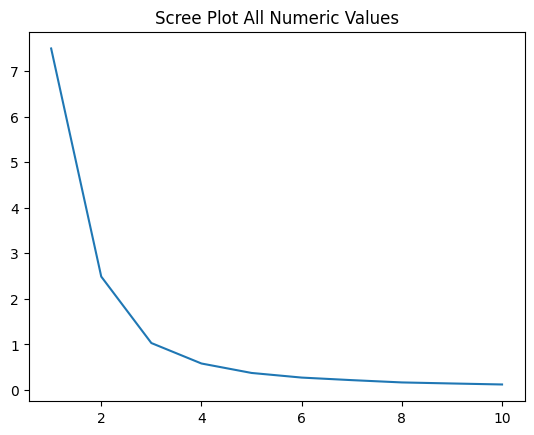

In [33]:
# scree plot
k_bar = 10
SSE = []
for k in range(k_bar):
    model3 = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model3 = model3.fit(X_3) # Fit the model
    SSE.append(model3.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot All Numeric Values') # Create scree plot
plt.show()

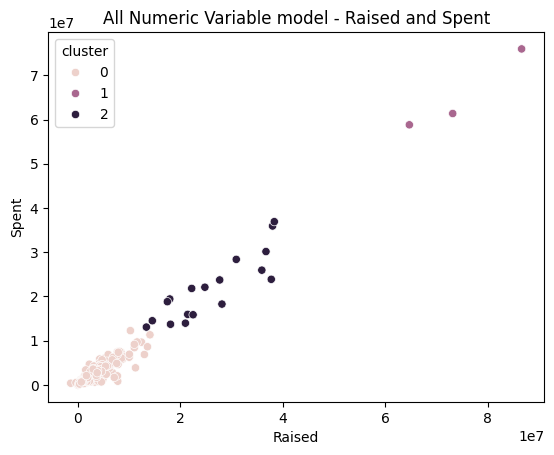

In [38]:
# fit the model using 3 clusters
model3 = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model3 = model3.fit(X_3) # Fit the model
df['cluster'] = model3.predict(X_3)
sns.scatterplot(data=df, x='Raised', y='Spent', hue='cluster')
plt.title('All Numeric Variable model - Raised and Spent')
plt.show()

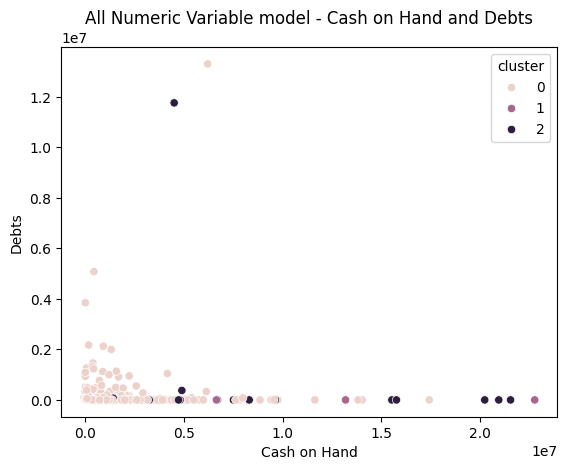

In [37]:
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='cluster')
plt.title('All Numeric Variable model - Cash on Hand and Debts')
plt.show()

**How do your results compare to the previous two parts?**

**Q 2.5 Did the  𝑘 -MC algorithm find useful patterns for you in analyzing the election?**

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?